In [1]:
from rio_tiler.io import Reader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tif to bands

In [3]:
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
import numpy as np
import os

tif_path = "/root/Ship_Detection_EO/sat_image/sentinel_2/20230109T021051_20230109T021649_T52SED/20230109T021051_20230109T021649_T52SED.tif"
out_folder = "/root/Ship_Detection_EO/sat_image/sentinel_2/20230109T021051_20230109T021649_T52SED"

# Open the satellite image
with rasterio.open(tif_path) as src:
    # Read the image data
    image = src.read()

    # Check if the image has at least 3 channels
    if image.shape[0] < 3:
        raise ValueError("The provided image does not have enough channels to extract RGB.")

    # Extract the individual RGB channels
    red_channel = image[0, :, :]
    green_channel = image[1, :, :]
    blue_channel = image[2, :, :]

    # Save each channel as a separate TIFF file
    profile = src.profile
    profile.update(count=1)

    with rasterio.open(os.path.join(out_folder, 'red.tif'), 'w', **profile) as dst_r:
        dst_r.write(red_channel, 1)

    with rasterio.open(os.path.join(out_folder, 'green.tif'), 'w', **profile) as dst_g:
        dst_g.write(green_channel, 1)

    with rasterio.open(os.path.join(out_folder, 'blue.tif'), 'w', **profile) as dst_b:
        dst_b.write(blue_channel, 1)

print("Channels have been successfully saved as r.tif, g.tif, and b.tif.")


Channels have been successfully saved as r.tif, g.tif, and b.tif.


In [5]:
bands=['red', 'green', 'blue']

def normalize(image, band_axis=2):
    image = image.astype(np.float32)
    axis = [0,1] if band_axis == 2 else [1,2]
    min_vals, max_vals = np.quantile(image, [0., 0.99], axis=axis, keepdims=True)
    
    image = (image - min_vals) / (max_vals - min_vals)
    image = image.clip(0, 1)
    return image

image = []
for i, band in enumerate(bands):
    band_path = os.path.join(out_folder, f'{band}.tif')
    
    with rasterio.open(band_path) as src:
        img = src.read()

    image.append(img)

image = np.concatenate(image)
image = image.transpose(1,2,0)
image = normalize(image)
image = (image * 255).astype(np.uint8)
print("final image shape : ", image.shape)
print("final image : ", image)

final image shape :  (3771, 6585, 3)
final image :  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
# save numpy as png 
# Convert NumPy array to Pillow Image object
import PIL
image = PIL.Image.fromarray(image)

# Save the image
image.save(os.path.join( out_folder,"RGB.png"))

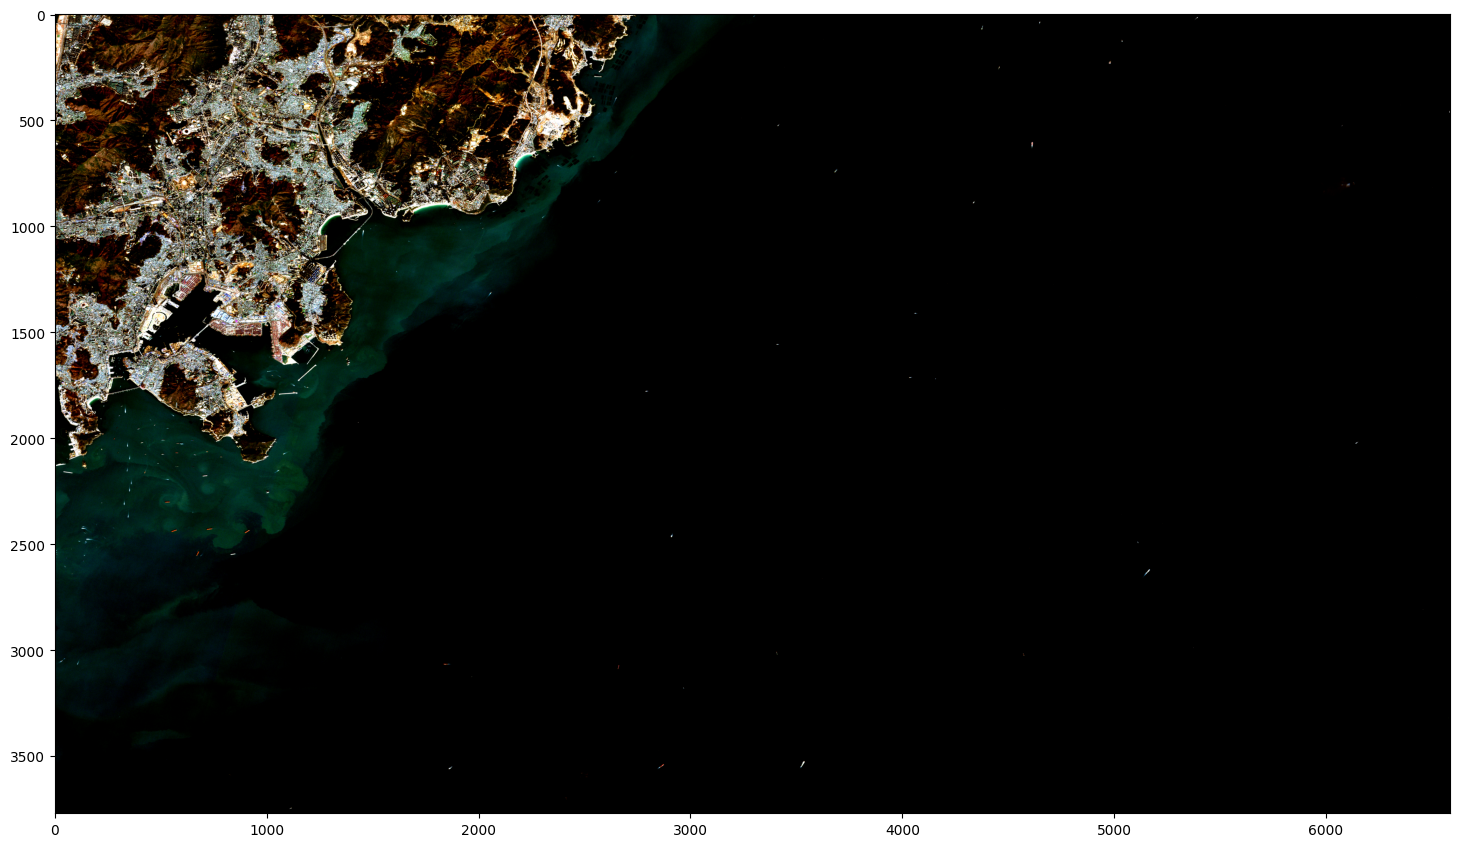

In [7]:
plt.figure(figsize=(18,18))
plt.imshow(image)